In [2]:
import torch
import math 
## GPT2 configurations 
context_size = 1024
dim_model    = 768

tensor = torch.empty(1024, 768)
print(tensor.shape)

torch.Size([1024, 768])


In [5]:
pos_enc = torch.zeros(context_size,dim_model)
        
        ## vector of shape (seq_len,1)
position = torch.arange(0,context_size,dtype=torch.float).unsqueeze(1)

## denominator of the formula 
div_term = torch.exp(torch.arange(0,dim_model,2).float() * (-math.log(10000.0) / dim_model)) 
## sine to even positions 
pos_enc[:,0::2] = torch.sin(position*div_term)
## cosine to odd position
pos_enc[:,1::2] = torch.cos(position * div_term)


In [6]:
pos_enc.shape

torch.Size([1024, 768])

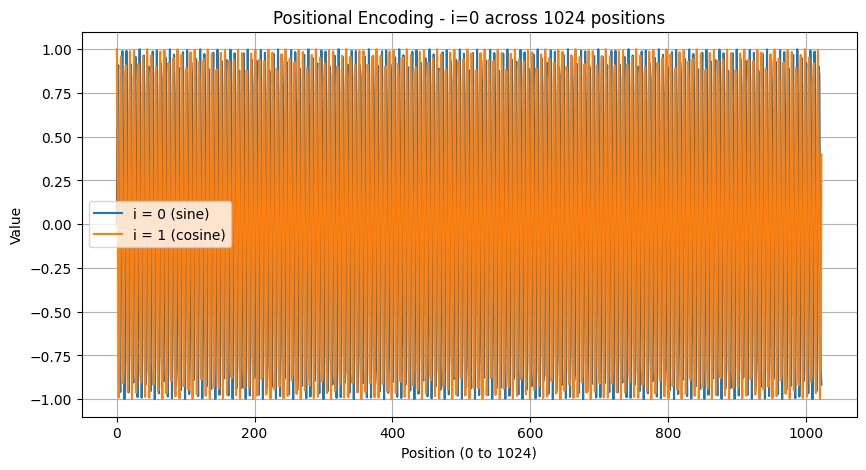

In [12]:
import matplotlib.pyplot as plt
i=0
# Extract column 0 and 1
values_i0 = pos_enc[:, 2*i]   # sine
values_i1 = pos_enc[:, 2*i+1]   # cosine

plt.figure(figsize=(10,5))
plt.plot(values_i0, label="i = 0 (sine)")
plt.plot(values_i1, label="i = 1 (cosine)")
plt.title("Positional Encoding - i=0 across 1024 positions")
plt.xlabel("Position (0 to 1024)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


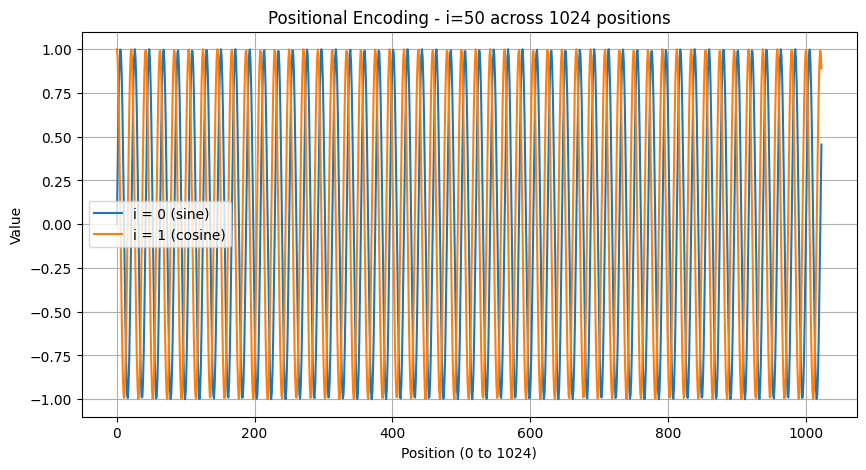

In [13]:
import matplotlib.pyplot as plt
i=50
# Extract column 0 and 1
values_i0 = pos_enc[:, 2*i]   # sine
values_i1 = pos_enc[:, 2*i+1]   # cosine

plt.figure(figsize=(10,5))
plt.plot(values_i0, label="i = 0 (sine)")
plt.plot(values_i1, label="i = 1 (cosine)")
plt.title("Positional Encoding - i=50 across 1024 positions")
plt.xlabel("Position (0 to 1024)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


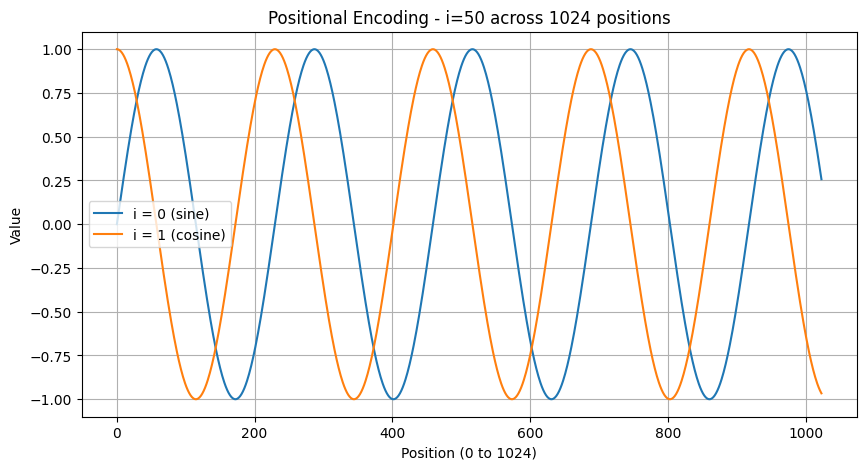

In [16]:
import matplotlib.pyplot as plt
i=150
# Extract column 0 and 1
values_i0 = pos_enc[:, 2*i]   # sine
values_i1 = pos_enc[:, 2*i+1]   # cosine

plt.figure(figsize=(10,5))
plt.plot(values_i0, label="i = 0 (sine)")
plt.plot(values_i1, label="i = 1 (cosine)")
plt.title("Positional Encoding - i=50 across 1024 positions")
plt.xlabel("Position (0 to 1024)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


As the case of the binary positional encoding ; Lower indices oscillate fast between positions ; 
higher indices oscillate slowly between indices 

The difference is that with Sinusoidal Position Encoding we have smoother curves which is better for model optimization
 since it is difficult for LLMs optimization to deal with the "jumps" caused by he binary positional encoding. 